# Data Understanding and Preparation

In [1429]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from jcopml.plot import plot_missing_value

## Loading the dataset

In [1430]:
df = pd.read_csv('../dataset/customer_supermarket.csv', sep='\t', index_col=0)
df

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,01/12/10 08:26,"2,55",17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,01/12/10 08:26,"2,75",17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6
...,...,...,...,...,...,...,...,...
541905,581587,09/12/11 12:50,"2,1",12680.0,France,22899,CHILDREN'S APRON DOLLY GIRL,6
541906,581587,09/12/11 12:50,"4,15",12680.0,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4
541907,581587,09/12/11 12:50,"4,15",12680.0,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4
541908,581587,09/12/11 12:50,"4,95",12680.0,France,22138,BAKING SET 9 PIECE RETROSPOT,3


## Basic checks

In [1431]:
df.drop_duplicates(ignore_index=True, inplace=True)
df

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,01/12/10 08:26,"2,55",17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,01/12/10 08:26,"2,75",17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6
...,...,...,...,...,...,...,...,...
466673,581587,09/12/11 12:50,"2,1",12680.0,France,22899,CHILDREN'S APRON DOLLY GIRL,6
466674,581587,09/12/11 12:50,"4,15",12680.0,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4
466675,581587,09/12/11 12:50,"4,15",12680.0,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4
466676,581587,09/12/11 12:50,"4,95",12680.0,France,22138,BAKING SET 9 PIECE RETROSPOT,3


In [1432]:
df.dtypes

BasketID            object
BasketDate          object
Sale                object
CustomerID         float64
CustomerCountry     object
ProdID              object
ProdDescr           object
Qta                  int64
dtype: object

In [1433]:
df['Sale'] = df['Sale'].str.replace(',', '.')
df['Sale'] = pd.to_numeric(df['Sale'])
df = df.astype({'BasketDate': 'datetime64',
                'CustomerID': 'object'})

In [1434]:
df.dtypes

BasketID                   object
BasketDate         datetime64[ns]
Sale                      float64
CustomerID                 object
CustomerCountry            object
ProdID                     object
ProdDescr                  object
Qta                         int64
dtype: object

In [1435]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466678 entries, 0 to 466677
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   BasketID         466678 non-null  object        
 1   BasketDate       466678 non-null  datetime64[ns]
 2   Sale             466678 non-null  float64       
 3   CustomerID       401605 non-null  object        
 4   CustomerCountry  466678 non-null  object        
 5   ProdID           466678 non-null  object        
 6   ProdDescr        465925 non-null  object        
 7   Qta              466678 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 28.5+ MB


In [1436]:
df.isnull().any()

BasketID           False
BasketDate         False
Sale               False
CustomerID          True
CustomerCountry    False
ProdID             False
ProdDescr           True
Qta                False
dtype: bool

,missing_value,%
BasketID,0,0.00
BasketDate,0,0.00
Sale,0,0.00
CustomerID,65073,13.94
CustomerCountry,0,0.00
ProdID,0,0.00
ProdDescr,753,0.16
Qta,0,0.00


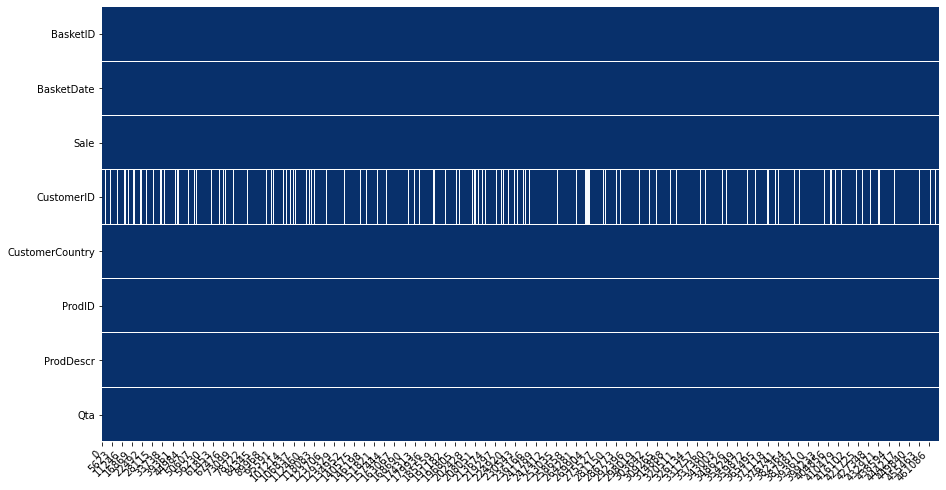

In [1437]:
plot_missing_value(df, return_df=True)

In [1438]:
df.describe()

,Sale,Qta
count,466678.000000,466678.000000
mean,4.049057,10.806528
std,84.237135,232.627771
min,-11062.060000,-80995.000000
25%,1.250000,2.000000
50%,2.080000,4.000000
75%,3.750000,12.000000
max,38970.000000,80995.000000


## Data Cleaning and Integration

### Products

First of all, it seems that there are some null values in the *ProdDescr* column:

In [1399]:
prods = df.groupby('ProdID')['ProdDescr'].describe().reset_index()
prods

,ProdID,count,unique,top,freq
0,10002,62,1,INFLATABLE POLITICAL GLOBE,62
1,10080,21,1,GROOVY CACTUS INFLATABLE,21
2,10120,29,1,DOGGY RUBBER,29
3,10123C,3,1,HEARTS WRAPPING TAPE,3
4,10123G,0,0,NaN,NaN
...,...,...,...,...,...
3948,gift_0001_20,4,2,Dotcomgiftshop Gift Voucher £20.00,3
3949,gift_0001_30,4,1,Dotcomgiftshop Gift Voucher £30.00,4
3950,gift_0001_40,3,1,Dotcomgiftshop Gift Voucher £40.00,3
3951,gift_0001_50,2,1,Dotcomgiftshop Gift Voucher £50.00,2


In [1400]:
null_prods = prods[(prods['count'] == 0) & (prods['top'].isnull())]
null_prods

,ProdID,count,unique,top,freq
4,10123G,0,0,NaN,NaN
9,10134,0,0,NaN,NaN
46,16053,0,0,NaN,NaN
85,17011A,0,0,NaN,NaN
187,20738,0,0,NaN,NaN
...,...,...,...,...,...
3702,90095,0,0,NaN,NaN
3712,90112,0,0,NaN,NaN
3932,DCGS0057,0,0,NaN,NaN
3933,DCGS0066P,0,0,NaN,NaN


So, in order to clean in this sense, we need to remove records for which the *ProdID* appear just one time with null description:

In [1401]:
df = df[~df.ProdID.isin(null_prods.ProdID)]
df.reset_index(drop=True, inplace=True)
df

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,2010-01-12 08:26:00,2.55,17850,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,2010-01-12 08:26:00,2.75,17850,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6
...,...,...,...,...,...,...,...,...
466609,581587,2011-09-12 12:50:00,2.10,12680,France,22899,CHILDREN'S APRON DOLLY GIRL,6
466610,581587,2011-09-12 12:50:00,4.15,12680,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4
466611,581587,2011-09-12 12:50:00,4.15,12680,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4
466612,581587,2011-09-12 12:50:00,4.95,12680,France,22138,BAKING SET 9 PIECE RETROSPOT,3


Then, in order to integrate the remaining null *ProdDescr*, we copy the description of the product with the same *ProdID* for those in which it missing:

In [1402]:
df['ProdDescr'] = df['ProdDescr'].replace('check|lost', np.nan, regex=True)

In [1403]:
df['ProdDescr'] = np.where(df['ProdDescr'].isnull(), df['ProdID'].map(prods.set_index('ProdID')['top']), df['ProdDescr'])

In [1404]:
df['ProdDescr'].isnull().any()

False

Now we need to remove the rows corresponding to lower or mixed case descriptions which will be not effective for the feature extraction step since they don't represent a product description:

In [1405]:
del_descr = df[(df['ProdDescr'].str.islower()) | # lower case
               (~df['ProdDescr'].str.islower() & ~df['ProdDescr'].str.isupper())]['ProdDescr'].unique() # mixed case
del_descr

array(['Discount', 'BAG 500g SWIRLY MARBLES',
       'POLYESTER FILLER PAD 45x45cm', 'POLYESTER FILLER PAD 45x30cm',
       'POLYESTER FILLER PAD 40x40cm', 'FRENCH BLUE METAL DOOR SIGN No',
       'Manual', 'BAG 250g SWIRLY MARBLES', 'BAG 125g SWIRLY MARBLES',
       '3 TRADITIONAl BISCUIT CUTTERS  SET', 'Bank Charges',
       'NUMBER TILE COTTAGE GARDEN No', 'amazon',
       'FOLK ART GREETING CARD,pack/12',
       'ESSENTIAL BALM 3.5g TIN IN ENVELOPE',
       'POLYESTER FILLER PAD 65CMx65CM', "Dad's Cab Electronic Meter",
       'NUMBER TILE VINTAGE FONT No ', 'Dotcom sales',
       'POLYESTER FILLER PAD 30CMx30CM',
       'Dotcomgiftshop Gift Voucher £40.00', 'reverse 21/5/10 adjustment',
       'Dotcomgiftshop Gift Voucher £30.00',
       'Dotcomgiftshop Gift Voucher £20.00', 'mouldy, thrown away.',
       'found', 'Found', "Dr. Jam's Arouzer Stress Ball", '?',
       'label mix up', 'samples/damages', 'thrown away', 'damages',
       'showroom', 'wrongly sold as sets', 'dotcom sol

In [1406]:
df['ProdDescr'] = df['ProdDescr'].str.replace('[^\w\s]', '') # removing punctuation
df['ProdDescr'] = df['ProdDescr'].str.replace('\w*\d\w*', '') # removing words with numbers

df['ProdDescr'] = df['ProdDescr'].str.strip() # removing spaces at the beginning and at the end

# adjusting errors
df['ProdDescr'] = df['ProdDescr'].str.replace('No', '') # removing 'No'
df['ProdDescr'].replace({'TRADITIONAl BISCUIT CUTTERS  SET': 'TRADITIONAl BISCUIT CUTTERS  SET'.upper()}, inplace=True)
df['ProdDescr'].replace({'Dads Cab Electronic Meter': 'Dads Cab Electronic Meter'.upper()}, inplace=True)
df['ProdDescr'].replace({'Dr Jams Arouzer Stress Ball': 'Dr Jams Arouzer Stress Ball'.upper()}, inplace=True)
df['ProdDescr'].replace({'Dotcomgiftshop Gift Voucher': 'Dotcomgiftshop Gift Voucher'.upper()}, inplace=True)
df['ProdDescr'].replace({'FLOWERS HANDBAG blue and orange': 'FLOWERS HANDBAG blue and orange'.upper()}, inplace=True)

del_descr = df[(df['ProdDescr'].str.islower()) | # lower case
               (~df['ProdDescr'].str.islower() & ~df['ProdDescr'].str.isupper())]['ProdDescr'].unique() # mixed case
del_descr

array(['Discount', 'Manual', 'Bank Charges', 'amazon', 'Dotcom sales',
       'reverse  adjustment', 'mouldy thrown away', 'found', 'Found', '',
       'label mix up', 'samplesdamages', 'thrown away', 'damages',
       'showroom', 'wrongly sold as sets', 'dotcom sold sets',
       'Amazon sold sets', 'wrongly sold sets', 'sold as sets',
       'damagesdisplay', 'damaged stock', 're dotcom quick fix',
       'sold in set', 'damaged', 'Damaged', 'Missing', 'adjustment',
       'returned', 'wrong code', 'crushed', 'damagescredits from ASOS',
       'mailout', 't rcvd in  delivery', 'Thrown awayrusty',
       'damagesdotcom', 'smashed', 'reverse previous adjustment',
       'incorrectly credited  see', 'Next Day Carriage', 'wet damaged',
       'Water damaged', 'missing', 'sold as set on dotcom',
       'to push order througha s stock was', 'mix up with c',
       'came coded as', 'alan hodge cant mamage this section', 'dotcom',
       'ebay', 'Sold as  on dotcom', 'Adjust bad debt',
     

In [1407]:
df = df[~(df['ProdDescr'].isin(del_descr))]
df.reset_index(drop=True, inplace=True)
df

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,2010-01-12 08:26:00,2.55,17850,United Kingdom,85123A,WHITE HANGING HEART TLIGHT HOLDER,6
1,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,2010-01-12 08:26:00,2.75,17850,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART,6
...,...,...,...,...,...,...,...,...
465694,581587,2011-09-12 12:50:00,2.10,12680,France,22899,CHILDRENS APRON DOLLY GIRL,6
465695,581587,2011-09-12 12:50:00,4.15,12680,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4
465696,581587,2011-09-12 12:50:00,4.15,12680,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4
465697,581587,2011-09-12 12:50:00,4.95,12680,France,22138,BAKING SET PIECE RETROSPOT,3


Also, we notice the presence of some negative quantities which can be considered as a refund of previous orders:

In [1408]:
neg_qta = df[df['Qta'] < 0]
neg_qta

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
153,C536383,2010-01-12 09:49:00,4.65,15311,United Kingdom,35004C,SET OF COLOURED FLYING DUCKS,-1
234,C536391,2010-01-12 10:24:00,1.65,17548,United Kingdom,22556,PLASTERS IN TIN CIRCUS PARADE,-12
235,C536391,2010-01-12 10:24:00,0.29,17548,United Kingdom,21984,PACK OF PINK PAISLEY TISSUES,-24
236,C536391,2010-01-12 10:24:00,0.29,17548,United Kingdom,21983,PACK OF BLUE PAISLEY TISSUES,-24
237,C536391,2010-01-12 10:24:00,0.29,17548,United Kingdom,21980,PACK OF RED RETROSPOT TISSUES,-24
...,...,...,...,...,...,...,...,...
464775,C581490,2011-09-12 09:57:00,1.95,14397,United Kingdom,22178,VICTORIAN GLASS HANGING TLIGHT,-12
464776,C581490,2011-09-12 09:57:00,0.83,14397,United Kingdom,23144,ZINC TLIGHT HOLDER STARS SMALL,-11
465504,C581568,2011-09-12 11:57:00,10.95,15311,United Kingdom,21258,VICTORIAN SEWING BOX LARGE,-5
465505,C581569,2011-09-12 11:58:00,1.25,17315,United Kingdom,84978,HANGING HEART JAR TLIGHT HOLDER,-1


But it doesn't make sense to maintain rows for which the *ProdID* appears just one time with negative quantity:

In [1409]:
counts = neg_qta['ProdID'].value_counts()
neg_qta = neg_qta[neg_qta['ProdID'].isin(counts.index[counts == 1])]
neg_qta

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
236,C536391,2010-01-12 10:24:00,0.29,17548,United Kingdom,21983,PACK OF BLUE PAISLEY TISSUES,-24
1690,C536548,2010-01-12 14:33:00,1.45,12472,Germany,20957,PORCELAIN HANGING BELL SMALL,-1
3673,536764,2010-02-12 14:42:00,0.00,NaN,United Kingdom,84952C,MIRROR LOVE BIRD TLIGHT HOLDER,-38
4150,C536812,2010-02-12 16:58:00,0.72,16546,United Kingdom,22574,HEART WOODEN CHRISTMAS DECORATION,-192
4151,C536812,2010-02-12 16:58:00,0.72,16546,United Kingdom,22593,CHRISTMAS GINGHAM STAR,-144
...,...,...,...,...,...,...,...,...
461758,C581229,2011-08-12 10:14:00,2.08,12558,USA,23392,SPACEBOY ROCKET LOLLY MAKERS,-24
461764,C581229,2011-08-12 10:14:00,0.42,12558,USA,21508,VINTAGE KID DOLLY CARD,-12
462755,C581384,2011-08-12 13:06:00,3.45,17673,United Kingdom,51008,AFGHAN SLIPPER SOCK PAIR,-2
464406,C581462,2011-08-12 18:51:00,0.06,12985,United Kingdom,16219,HOUSE SHAPE PENCIL SHARPENER,-48


In [1410]:
df = df[~df.ProdID.isin(neg_qta.ProdID)]
df.reset_index(drop=True, inplace=True)
df

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,2010-01-12 08:26:00,2.55,17850,United Kingdom,85123A,WHITE HANGING HEART TLIGHT HOLDER,6
1,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,2010-01-12 08:26:00,2.75,17850,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART,6
...,...,...,...,...,...,...,...,...
395660,581587,2011-09-12 12:50:00,2.10,12680,France,22899,CHILDRENS APRON DOLLY GIRL,6
395661,581587,2011-09-12 12:50:00,4.15,12680,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4
395662,581587,2011-09-12 12:50:00,4.15,12680,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4
395663,581587,2011-09-12 12:50:00,4.95,12680,France,22138,BAKING SET PIECE RETROSPOT,3


### Baskets

In [1411]:
df[df['BasketID'].apply(lambda x: False if x.isnumeric() else True)]['BasketID'].apply(lambda x: x[0]).unique()

array(['C'], dtype=object)

In [1412]:
c_bid = df[df['BasketID'].str.startswith('C')]
c_bid

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
140,C536383,2010-01-12 09:49:00,4.65,15311,United Kingdom,35004C,SET OF COLOURED FLYING DUCKS,-1
216,C536391,2010-01-12 10:24:00,1.65,17548,United Kingdom,22556,PLASTERS IN TIN CIRCUS PARADE,-12
217,C536391,2010-01-12 10:24:00,0.29,17548,United Kingdom,21984,PACK OF PINK PAISLEY TISSUES,-24
218,C536391,2010-01-12 10:24:00,0.29,17548,United Kingdom,21980,PACK OF RED RETROSPOT TISSUES,-24
219,C536391,2010-01-12 10:24:00,3.45,17548,United Kingdom,21484,CHICK GREY HOT WATER BOTTLE,-12
...,...,...,...,...,...,...,...,...
394904,C581490,2011-09-12 09:57:00,1.95,14397,United Kingdom,22178,VICTORIAN GLASS HANGING TLIGHT,-12
394905,C581490,2011-09-12 09:57:00,0.83,14397,United Kingdom,23144,ZINC TLIGHT HOLDER STARS SMALL,-11
395489,C581568,2011-09-12 11:57:00,10.95,15311,United Kingdom,21258,VICTORIAN SEWING BOX LARGE,-5
395490,C581569,2011-09-12 11:58:00,1.25,17315,United Kingdom,84978,HANGING HEART JAR TLIGHT HOLDER,-1


### Sales

Since there is no currency associated with the sale price, it is assumed to be the same for all records, furthermore, it is assumed that the sale price refers to a single item:

In [1413]:
max(df['Sale'])

16453.71

In [1414]:
min(df['Sale'])

0.0

In [1415]:
df[df['Sale'] == 0]

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
1441,536546,2010-01-12 14:33:00,0.0,NaN,United Kingdom,22145,CHRISTMAS CRAFT HEART STOCKING,1
1468,536553,2010-01-12 14:35:00,0.0,NaN,United Kingdom,37461,FUNKY MONKEY MUG,3
5049,536996,2010-03-12 15:30:00,0.0,NaN,United Kingdom,22712,CARD DOLLY GIRL,-20
5050,537000,2010-03-12 15:32:00,0.0,NaN,United Kingdom,21414,SCALLOP SHELL SOAP DISH,-22
5051,537003,2010-03-12 15:33:00,0.0,NaN,United Kingdom,85126,LARGE ROUND CUTGLASS CANDLESTICK,-2
...,...,...,...,...,...,...,...,...
391723,581203,2011-07-12 18:31:00,0.0,NaN,United Kingdom,23406,HOME SWEET HOME KEY HOLDER,15
391724,581211,2011-07-12 18:36:00,0.0,NaN,United Kingdom,22142,CHRISTMAS CRAFT WHITE FAIRY,14
391725,581212,2011-07-12 18:38:00,0.0,NaN,United Kingdom,22578,WOODEN STAR CHRISTMAS SCANDINAVIAN,-1050
392412,581234,2011-08-12 10:33:00,0.0,NaN,United Kingdom,72817,SET OF CHRISTMAS DECOUPAGE CANDLE,27


In [1416]:
df['Sale'].replace(0, np.nan, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [1417]:
df[df['Sale'].isnull()]

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
1441,536546,2010-01-12 14:33:00,NaN,NaN,United Kingdom,22145,CHRISTMAS CRAFT HEART STOCKING,1
1468,536553,2010-01-12 14:35:00,NaN,NaN,United Kingdom,37461,FUNKY MONKEY MUG,3
5049,536996,2010-03-12 15:30:00,NaN,NaN,United Kingdom,22712,CARD DOLLY GIRL,-20
5050,537000,2010-03-12 15:32:00,NaN,NaN,United Kingdom,21414,SCALLOP SHELL SOAP DISH,-22
5051,537003,2010-03-12 15:33:00,NaN,NaN,United Kingdom,85126,LARGE ROUND CUTGLASS CANDLESTICK,-2
...,...,...,...,...,...,...,...,...
391723,581203,2011-07-12 18:31:00,NaN,NaN,United Kingdom,23406,HOME SWEET HOME KEY HOLDER,15
391724,581211,2011-07-12 18:36:00,NaN,NaN,United Kingdom,22142,CHRISTMAS CRAFT WHITE FAIRY,14
391725,581212,2011-07-12 18:38:00,NaN,NaN,United Kingdom,22578,WOODEN STAR CHRISTMAS SCANDINAVIAN,-1050
392412,581234,2011-08-12 10:33:00,NaN,NaN,United Kingdom,72817,SET OF CHRISTMAS DECOUPAGE CANDLE,27


In [1418]:
df['Sale'] = df.groupby('ProdID')['Sale'].transform(lambda x: x.replace(to_replace=np.nan, value=x.mean()))

<ipython-input-1418-5cfea2f14368>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sale'] = df.groupby('ProdID')['Sale'].transform(lambda x: x.replace(to_replace=np.nan, value=x.mean()))


In [1419]:
df['Sale'].isnull().any()

False

### Customer Countries

In [1420]:
df['CustomerCountry'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [1421]:
df[df['CustomerCountry'] == 'European Community']

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
118935,551013,2011-04-26 10:54:00,14.95,15108,European Community,22839,TIER CAKE TIN GREEN AND CREAM,1
118936,551013,2011-04-26 10:54:00,7.95,15108,European Community,22840,ROUND CAKE TIN VINTAGE RED,2
118937,551013,2011-04-26 10:54:00,7.95,15108,European Community,22841,ROUND CAKE TIN VINTAGE GREEN,2
118938,551013,2011-04-26 10:54:00,2.95,15108,European Community,22457,NATURAL SLATE HEART CHALKBOARD,6
118939,551013,2011-04-26 10:54:00,2.95,15108,European Community,22312,OFFICE MUG WARMER POLKADOT,6
118940,551013,2011-04-26 10:54:00,6.75,15108,European Community,22842,BISCUIT TIN VINTAGE RED,2
118941,551013,2011-04-26 10:54:00,6.75,15108,European Community,22843,BISCUIT TIN VINTAGE GREEN,2
118942,551013,2011-04-26 10:54:00,12.75,15108,European Community,22424,ENAMEL BREAD BIN CREAM,1
118943,551013,2011-04-26 10:54:00,3.95,15108,European Community,22722,SET OF SPICE TINS PANTRY DESIGN,4
118944,551013,2011-04-26 10:54:00,18.00,15108,European Community,POST,POSTAGE,2


In [1422]:
df[df['CustomerCountry'] == 'Unspecified']

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
107618,549687,2011-11-04 13:29:00,7.95,12363,Unspecified,20685,DOORMAT RED RETROSPOT,2
107619,549687,2011-11-04 13:29:00,7.95,12363,Unspecified,22691,DOORMAT WELCOME SUNRISE,2
107620,549687,2011-11-04 13:29:00,7.95,12363,Unspecified,48116,DOORMAT MULTICOLOUR STRIPE,2
107621,549687,2011-11-04 13:29:00,0.55,12363,Unspecified,21977,PACK OF PINK PAISLEY CAKE CASES,24
107622,549687,2011-11-04 13:29:00,0.55,12363,Unspecified,21976,PACK OF MUSHROOM CAKE CASES,24
...,...,...,...,...,...,...,...,...
365722,578539,2011-11-24 14:55:00,0.42,NaN,Unspecified,22541,MINI JIGSAW LEAP FROG,24
365723,578539,2011-11-24 14:55:00,0.42,NaN,Unspecified,23507,MINI PLAYING CARDS BUFFALO BILL,20
365724,578539,2011-11-24 14:55:00,1.25,NaN,Unspecified,23570,TRADITIONAL PICK UP STICKS GAME,12
365725,578539,2011-11-24 14:55:00,1.65,NaN,Unspecified,23571,TRADITIONAL NAUGHTS CROSSES,12


### Customers

Finally, we remove the records for which the *BasketID* is null:

In [1423]:
df[df['CustomerID'].isnull()]

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
1216,536544,2010-01-12 14:32:00,1.66,NaN,United Kingdom,21787,RAIN PONCHO RETROSPOT,2
1217,536544,2010-01-12 14:32:00,1.66,NaN,United Kingdom,21790,VINTAGE SNAP CARDS,9
1218,536544,2010-01-12 14:32:00,2.51,NaN,United Kingdom,21791,VINTAGE HEADS AND TAILS CARD GAME,2
1219,536544,2010-01-12 14:32:00,2.51,NaN,United Kingdom,21810,CHRISTMAS HANGING STAR WITH BELL,3
1220,536544,2010-01-12 14:32:00,4.21,NaN,United Kingdom,21822,GLITTER CHRISTMAS TREE WITH BELLS,1
...,...,...,...,...,...,...,...,...
395351,581498,2011-09-12 10:26:00,8.29,NaN,United Kingdom,84997b,CHILDRENS CUTLERY RETROSPOT RED,3
395352,581498,2011-09-12 10:26:00,4.13,NaN,United Kingdom,85038,CHOCOLATE LOVE HEART TLIGHTS,1
395353,581498,2011-09-12 10:26:00,3.29,NaN,United Kingdom,85049a,TRADITIONAL CHRISTMAS RIBBONS,5
395354,581498,2011-09-12 10:26:00,4.96,NaN,United Kingdom,85150,LADIES GENTLEMEN METAL SIGN,1


In [1424]:
df = df[~df['CustomerID'].isnull()]
df.reset_index(drop=True, inplace=True)
df

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,2010-01-12 08:26:00,2.55,17850,United Kingdom,85123A,WHITE HANGING HEART TLIGHT HOLDER,6
1,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,2010-01-12 08:26:00,2.75,17850,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART,6
...,...,...,...,...,...,...,...,...
343517,581587,2011-09-12 12:50:00,2.10,12680,France,22899,CHILDRENS APRON DOLLY GIRL,6
343518,581587,2011-09-12 12:50:00,4.15,12680,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4
343519,581587,2011-09-12 12:50:00,4.15,12680,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4
343520,581587,2011-09-12 12:50:00,4.95,12680,France,22138,BAKING SET PIECE RETROSPOT,3


In [1425]:
df['CustomerID'].isnull().any()

False

## Statistics

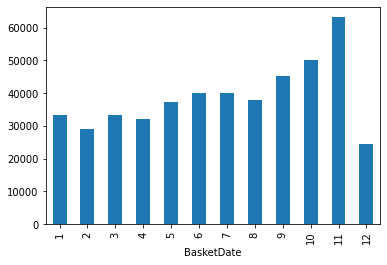

In [540]:
df['BasketDate'].groupby(df['BasketDate'].dt.month).count().plot(kind='bar')

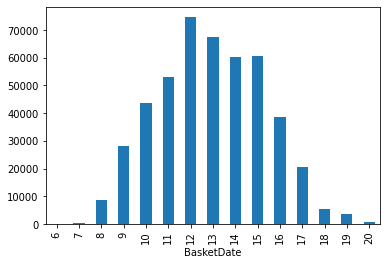

In [541]:
df['BasketDate'].groupby(df['BasketDate'].dt.hour).count().plot(kind='bar')

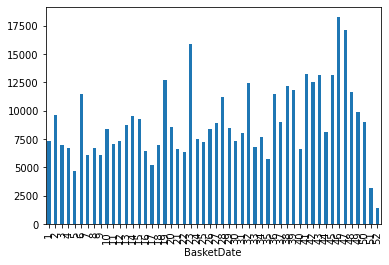

In [542]:
df['BasketDate'].groupby(df['BasketDate'].dt.week).count().plot(kind='bar')

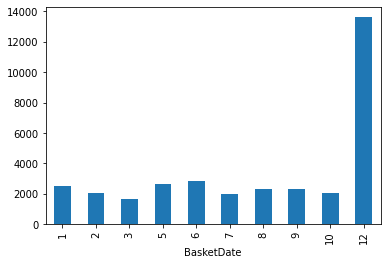

In [543]:
df[df['BasketDate'].dt.year == 2010]['BasketDate'].groupby(df['BasketDate'].dt.month).count().plot(kind='bar')

In [544]:
df[df['BasketDate'].dt.year == 2010]

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,2010-01-12 08:26:00,2.55,17850,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,2010-01-12 08:26:00,2.75,17850,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6
...,...,...,...,...,...,...,...,...
33890,539991,2010-12-23 16:49:00,4.95,NaN,United Kingdom,22649,STRAWBERRY FAIRY CAKE TEAPOT,1
33891,539991,2010-12-23 16:49:00,19.95,NaN,United Kingdom,22802,FAUX FUR CHOCOLATE THROW,1
33892,539991,2010-12-23 16:49:00,1.25,NaN,United Kingdom,21616,4 PEAR BOTANICAL DINNER CANDLES,1
33893,539991,2010-12-23 16:49:00,1.25,NaN,United Kingdom,21618,4 WILDFLOWER BOTANICAL CANDLES,1


In [545]:
df[df['BasketDate'].dt.year == 2011]

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
33895,539993,2011-04-01 10:00:00,1.95,13313,United Kingdom,22386,JUMBO BAG PINK POLKADOT,10
33896,539993,2011-04-01 10:00:00,0.42,13313,United Kingdom,21499,BLUE POLKADOT WRAP,25
33897,539993,2011-04-01 10:00:00,0.42,13313,United Kingdom,21498,RED RETROSPOT WRAP,25
33898,539993,2011-04-01 10:00:00,2.10,13313,United Kingdom,22379,RECYCLING BAG RETROSPOT,5
33899,539993,2011-04-01 10:00:00,1.25,13313,United Kingdom,20718,RED RETROSPOT SHOPPER BAG,10
...,...,...,...,...,...,...,...,...
466673,581587,2011-09-12 12:50:00,2.10,12680,France,22899,CHILDREN'S APRON DOLLY GIRL,6
466674,581587,2011-09-12 12:50:00,4.15,12680,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4
466675,581587,2011-09-12 12:50:00,4.15,12680,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4
466676,581587,2011-09-12 12:50:00,4.95,12680,France,22138,BAKING SET 9 PIECE RETROSPOT,3


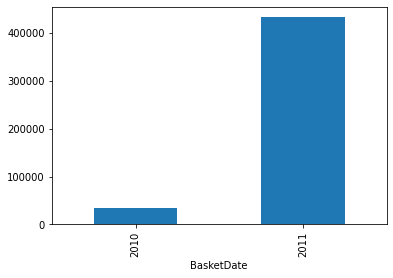

In [546]:
df['BasketDate'].groupby(df['BasketDate'].dt.year).count().plot(kind='bar')

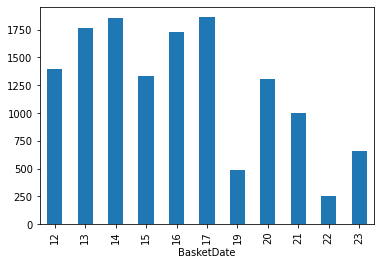

In [547]:
df[(df['BasketDate'].dt.year == 2010) & (df['BasketDate'].dt.month == 12)]['BasketDate'].groupby(df['BasketDate'].dt.day).count().plot(kind='bar')

# Feature Extraction

In [932]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [933]:
vectorizer = TfidfVectorizer()
vectorizer.fit_transform(df['ProdDescr'])

<465618x2117 sparse matrix of type '<class 'numpy.int64'>'
	with 1934685 stored elements in Compressed Sparse Row format>

# Clustering

# Pattern Discovery

In [1356]:
from mlxtend.frequent_patterns import apriori, association_rules 